##**Fashion MNIST**
An MNIST-like dataset of 70,000 28x28 labeled fashion images

###**About Dataset**
####**Context**
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of **60,000** examples and a test set of **10,000** examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

###**Content**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

* To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
* For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


###**Labels**

Each training and test example is assigned to one of the following labels:


* **0** T-shirt/top
* **1** Trouser
* **2** Pullover
* **3** Dress
* **4** Coat
* **5** Sandal
* **6** Shirt
* **7** Sneaker
* **8** Bag
* **9** Ankle boot


TL;DR

* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)

###**Acknowledgements**
* Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

* Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

###**License**
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

##**Install necessary Libraries**

In [1]:
# Install the Kaggle and Gradio Library
!pip install kaggle gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.0 MB/s eta 0:00:00


##**Import the Libraries**

In [2]:
import numpy as np
import pandas as pd
import random
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras, metrics
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model, Sequential
from tensorflow.math import confusion_matrix
import cv2
from google.colab.patches import cv2_imshow
import gradio as gr

##**Seeding for reproducibility**

In [3]:
# Set seeds for reproducibility
random.seed(0)

np.random.seed(0)

tf.random.set_seed(0)

###**Data Preparation**

In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "fashion-mnist_train.csv" # Changed to point to an actual file within the dataset

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zalando-research/fashionmnist",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-4-a8ce8cb90558>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0  

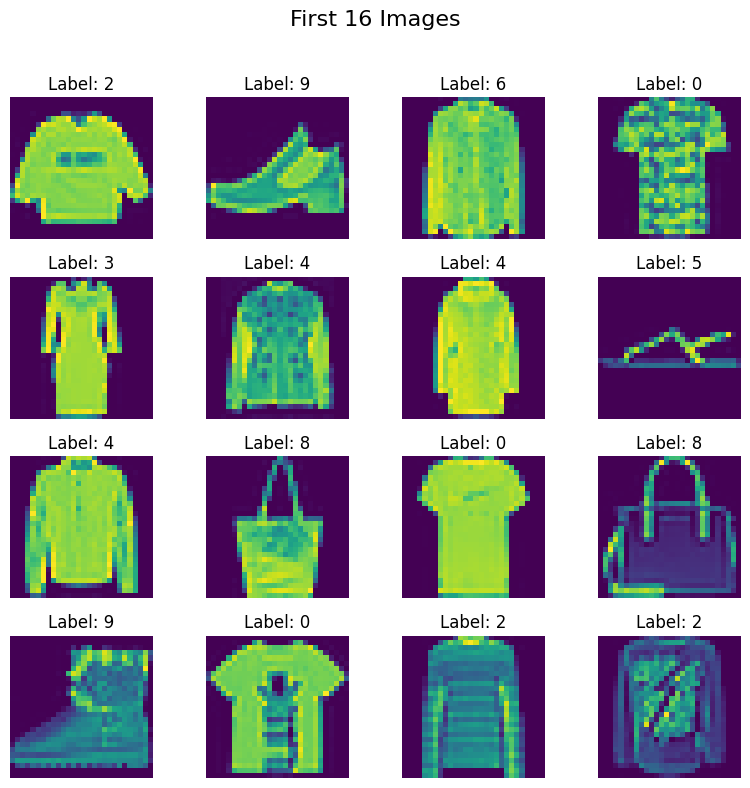

In [5]:
# Create a 4*4 grid of images
fig, axes = plt.subplots(4,4, figsize=(8,8))
fig.suptitle("First 16 Images", fontsize = 16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28,28)
    ax.imshow(img)   # Display in grayscale
    ax.axis('off')   # Remove axis for a clear look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect= [0,0,1,0.96])   # Adjust layout to fit the title
plt.show()

In [6]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


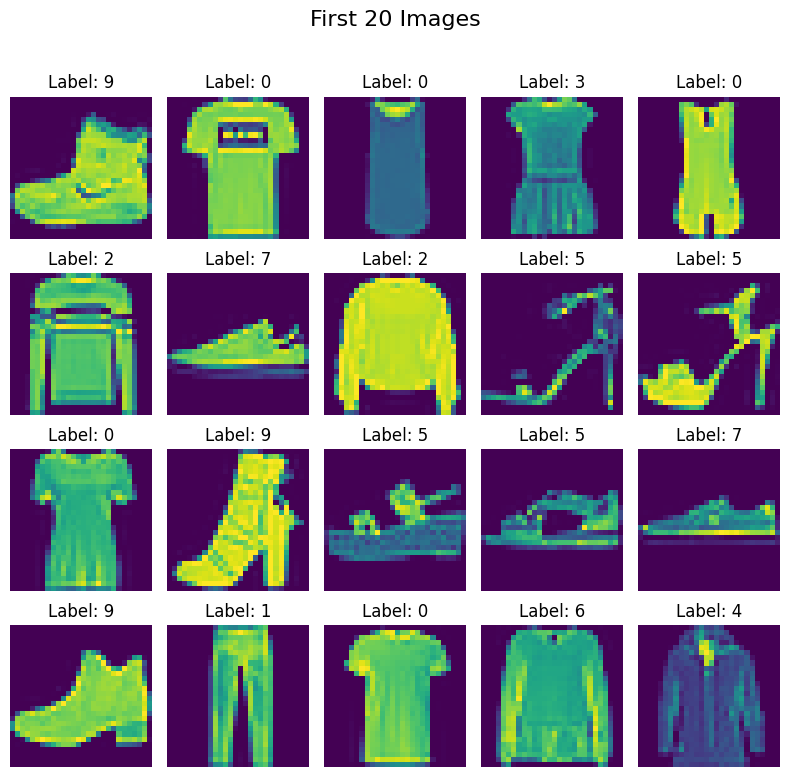

In [7]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 5, figsize=(8, 8))
fig.suptitle("First 20 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = train_images[i]
    ax.imshow(img)   # Display in grayscale
    ax.axis('off')   # Remove axis for a clear look
    ax.set_title(f"Label: {train_labels[i]}")  # Show the label

plt.tight_layout(rect= [0, 0 , 1, 0.96])   # Adjust layout to fit the title
plt.show()


###**Data Processing**

In [8]:
type(train_images)

numpy.ndarray

In [9]:
type(train_labels)

numpy.ndarray

In [10]:
print(len(train_images))

60000


In [11]:
print(len(train_labels))

60000


In [12]:
print(len(test_images))

10000


**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

In [13]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

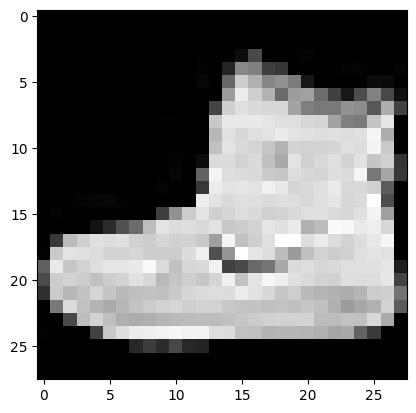

In [14]:
# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()


In [15]:
print(train_labels[0])

9


In [16]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [17]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [18]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [19]:
# The training set contains 60,000 grayscale images of size 28x28 pixels with 1 color channel
# Shape format: (num_samples, height, width, channels)
print(train_images.shape)  # Output: (60000, 28, 28, 1)

(60000, 28, 28, 1)


In [20]:
# The test set contains 10,000 grayscale images of size 28x28 pixels with 1 color channel
print(test_images.shape)   # Output: (10000, 28, 28, 1)

(10000, 28, 28, 1)


###**Building Simple CNN model for classifying**

In [21]:
# Reshape input data to match CNN expected input shape
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [22]:
# Building the convolutional base model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.3),  # NEW

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),  # NEW

    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# ⚙️ Compile with Optimized Settings
model.compile(
    optimizer=  keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
# Add callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1),
    ModelCheckpoint('best_classifier_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

In [25]:
print("train_images shape:",train_images.shape)
print("train_labels shape:", train_labels.shape)
print("Unique labels:", np.unique(train_labels))


train_images shape: (60000, 28, 28, 1)
train_labels shape: (60000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [26]:
# 🏋️‍♂️ Train the CNN classifier
history_1 = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(test_images, test_labels),
    callbacks=callbacks
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3730 - loss: 1.6708
Epoch 1: val_loss improved from inf to 0.77161, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.3734 - loss: 1.6698 - val_accuracy: 0.7135 - val_loss: 0.7716 - learning_rate: 0.0010
Epoch 2/20
462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7042 - loss: 0.7914
Epoch 2: val_loss improved from 0.77161 to 0.68672, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7043 - loss: 0.7910 - val_accuracy: 0.7420 - val_loss: 0.6867 - learning_rate: 0.0010
Epoch 3/20
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7315 - loss: 0.7081
Epoch 3: val_loss improved from 0.68672 to 0.63066, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7315 - loss: 0.7079 - val_accuracy: 0.7643 - val_loss: 0.6307 - learning_rate: 0.0010
Epoch 4/20
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7549 - loss: 0.6498
Epoch 4: val_loss improved from 0.63066 to 0.59384, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7549 - loss: 0.6497 - val_accuracy: 0.7741 - val_loss: 0.5938 - learning_rate: 0.0010
Epoch 5/20
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7711 - loss: 0.6106
Epoch 5: val_loss improved from 0.59384 to 0.56084, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7711 - loss: 0.6104 - val_accuracy: 0.7879 - val_loss: 0.5608 - learning_rate: 0.0010
Epoch 6/20
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7806 - loss: 0.5778
Epoch 6: val_loss improved from 0.56084 to 0.52540, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7806 - loss: 0.5776 - val_accuracy: 0.8003 - val_loss: 0.5254 - learning_rate: 0.0010
Epoch 7/20
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7966 - loss: 0.5455
Epoch 7: val_loss improved from 0.52540 to 0.51131, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7966 - loss: 0.5453 - val_accuracy: 0.8066 - val_loss: 0.5113 - learning_rate: 0.0010
Epoch 8/20
459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8055 - loss: 0.5216
Epoch 8: val_loss improved from 0.51131 to 0.48406, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8056 - loss: 0.5215 - val_accuracy: 0.8171 - val_loss: 0.4841 - learning_rate: 0.0010
Epoch 9/20
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8119 - loss: 0.5056
Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 9: val_loss did not improve from 0.48406
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8119 - loss: 0.5054 - val_accuracy: 0.8175 - val_loss: 0.4898 - learning_rate: 0.0010
Epoch 10/20
458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8205 - loss: 0.4840
Epoch 10: val_loss improved from 0.48406 to 0.45283, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8205 - loss: 0.4838 - val_accuracy: 0.8323 - val_loss: 0.4528 - learning_rate: 1.0000e-04
Epoch 11/20
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8255 - loss: 0.4705
Epoch 11: val_loss improved from 0.45283 to 0.44918, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8256 - loss: 0.4704 - val_accuracy: 0.8350 - val_loss: 0.4492 - learning_rate: 1.0000e-04
Epoch 12/20
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8246 - loss: 0.4664
Epoch 12: val_loss improved from 0.44918 to 0.44735, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8246 - loss: 0.4664 - val_accuracy: 0.8350 - val_loss: 0.4474 - learning_rate: 1.0000e-04
Epoch 13/20
457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8267 - loss: 0.4698
Epoch 13: val_loss improved from 0.44735 to 0.44389, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8267 - loss: 0.4697 - val_accuracy: 0.8371 - val_loss: 0.4439 - learning_rate: 1.0000e-04
Epoch 14/20
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8274 - loss: 0.4647
Epoch 14: val_loss improved from 0.44389 to 0.44279, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8274 - loss: 0.4647 - val_accuracy: 0.8368 - val_loss: 0.4428 - learning_rate: 1.0000e-04
Epoch 15/20
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8286 - loss: 0.4614
Epoch 15: val_loss improved from 0.44279 to 0.44196, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8286 - loss: 0.4614 - val_accuracy: 0.8369 - val_loss: 0.4420 - learning_rate: 1.0000e-04
Epoch 16/20
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8297 - loss: 0.4579
Epoch 16: val_loss improved from 0.44196 to 0.44038, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8297 - loss: 0.4579 - val_accuracy: 0.8378 - val_loss: 0.4404 - learning_rate: 1.0000e-04
Epoch 17/20
457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8297 - loss: 0.4570
Epoch 17: val_loss improved from 0.44038 to 0.43803, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8297 - loss: 0.4569 - val_accuracy: 0.8377 - val_loss: 0.4380 - learning_rate: 1.0000e-04
Epoch 18/20
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8290 - loss: 0.4579
Epoch 18: val_loss improved from 0.43803 to 0.43554, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8290 - loss: 0.4578 - val_accuracy: 0.8405 - val_loss: 0.4355 - learning_rate: 1.0000e-04
Epoch 19/20
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 0.4527
Epoch 19: val_loss improved from 0.43554 to 0.43490, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8327 - loss: 0.4526 - val_accuracy: 0.8395 - val_loss: 0.4349 - learning_rate: 1.0000e-04
Epoch 20/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8309 - loss: 0.4523
Epoch 20: val_loss improved from 0.43490 to 0.43326, saving model to best_classifier_model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8309 - loss: 0.4523 - val_accuracy: 0.8410 - val_loss: 0.4333 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 20.


In [27]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,171,232 (4.47 MB)

 Trainable params: 390,410 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 780,822 (2.98 MB)

###**Model Evaluation**

In [28]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8410 - loss: 0.4333

Test accuracy: 0.8410000205039978


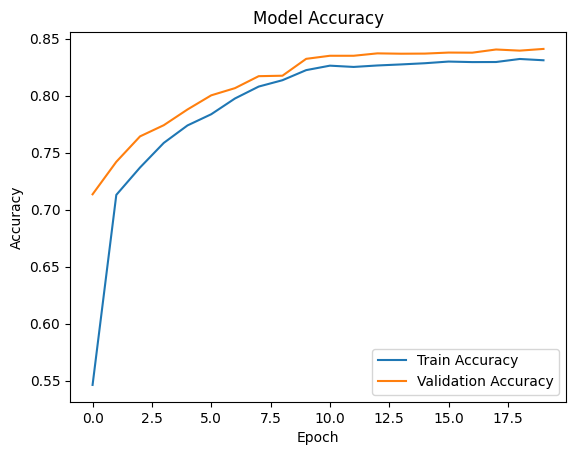

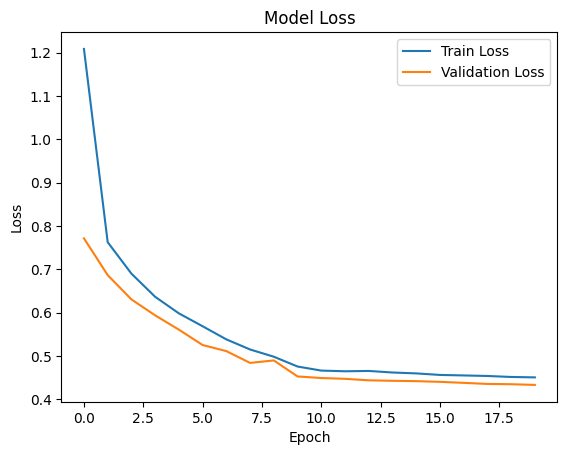

In [29]:
# Plot training & validation accuracy values
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [30]:
# Get predictions from the model
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_mat = confusion_matrix(test_labels, predicted_labels)
print(conf_mat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
tf.Tensor(
[[831   0  41  42   8   2  63   0  13   0]
 [  6 963   1  21   4   1   3   0   1   0]
 [ 13   1 735  13 127   0 103   0   8   0]
 [ 26  12  22 878  33   0  27   0   2   0]
 [  0   2  76  42 755   0 118   0   7   0]
 [  0   0   0   2   0 923   0  48   5  22]
 [200   1 136  28 119   0 493   0  23   0]
 [  0   0   0   0   0  23   0 915   0  62]
 [  2   2   9   4   6   2   7   4 963   1]
 [  0   0   0   0   0   7   0  38   1 954]], shape=(10, 10), dtype=int32)


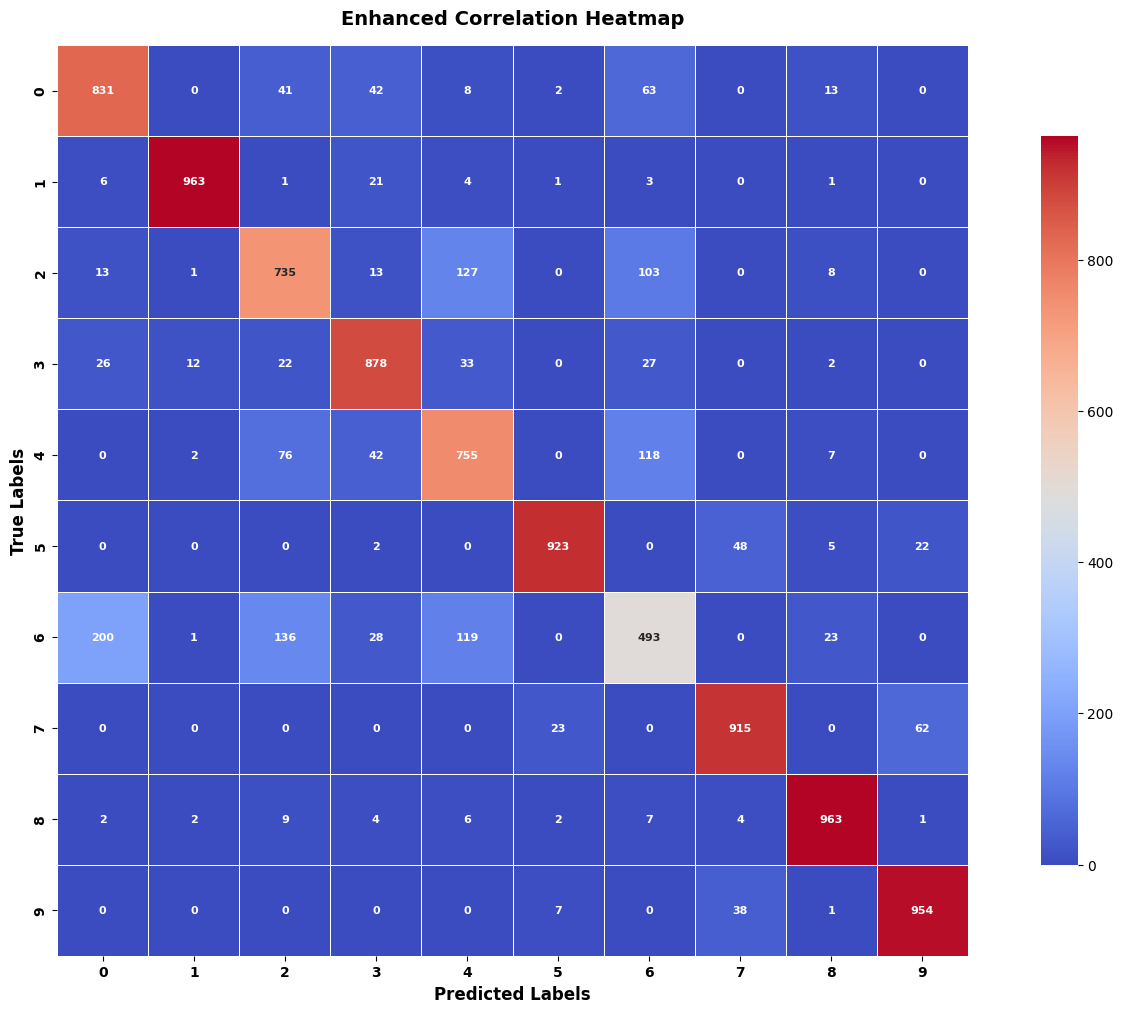

In [31]:
# Create the heatmap with enhancements
plt.figure(figsize=(15, 10))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt="d",  # integers
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()
plt.ylabel("True Labels", fontsize=12, fontweight="bold")
plt.xlabel("Predicted Labels", fontsize=12, fontweight="bold")
plt.show()

###**Building Predictive System**

In [32]:
# Fashion MNIST class names
class_names = [
    "T-shirt/top 👕", "Trouser 👖", "Pullover 🧥", "Dress 👗", "Coat 🧥",
    "Sandal 🩴", "Shirt 👔", "Sneaker 👟", "Bag 👜", "Ankle boot 👢"
]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
# Building predictive model
def predict_fashion_image(image):
    """🧵 Predict the top 3 Fashion MNIST categories with confidence scores."""

    # 🖤 Convert to grayscale (Fashion MNIST is grayscale)
    image_gray = image.convert('L')

    # 📏 Resize to 28x28 pixels
    image_resized = image_gray.resize((28, 28))

    # 🧮 Convert to numpy array & Normalize pixel values to range [0, 1]
    img_array = np.array(image_resized) / 255.0

    # 🔄 Reshape for the CNN model (batch_size, height, width, channels)
    img_input = img_array.reshape(1, 28, 28, 1)

    # 🧠 Make prediction
    prediction = model.predict(img_input)[0]

    # 📊 Get top 3 predictions with scores
    top_indices = prediction.argsort()[-3:][::-1]
    top_classes = [class_names[i] for i in top_indices]
    top_scores = [round(prediction[i] * 100, 2) for i in top_indices]

    # 📝 Format top-3 as a dictionary (for bar plot display)
    result_dict = {top_classes[i]: top_scores[i] for i in range(3)}

    return result_dict


In [34]:
import gradio as gr

interface = gr.Interface(
    fn=predict_fashion_image,
    inputs=gr.Image(type="pil", label="📷 Upload Fashion Image"),
    outputs=gr.Label(num_top_classes=3, label="🎯 Top Predictions"),  # Show confidence scores as bar chart
    title="👗 Fashion MNIST Predictor",
    description="Upload a grayscale image of a fashion item and get the top 3 predicted classes with confidence scores."
)

interface.launch(debug=True)

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3e8c783ea22ff87927.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3e8c783ea22ff87927.gradio.live


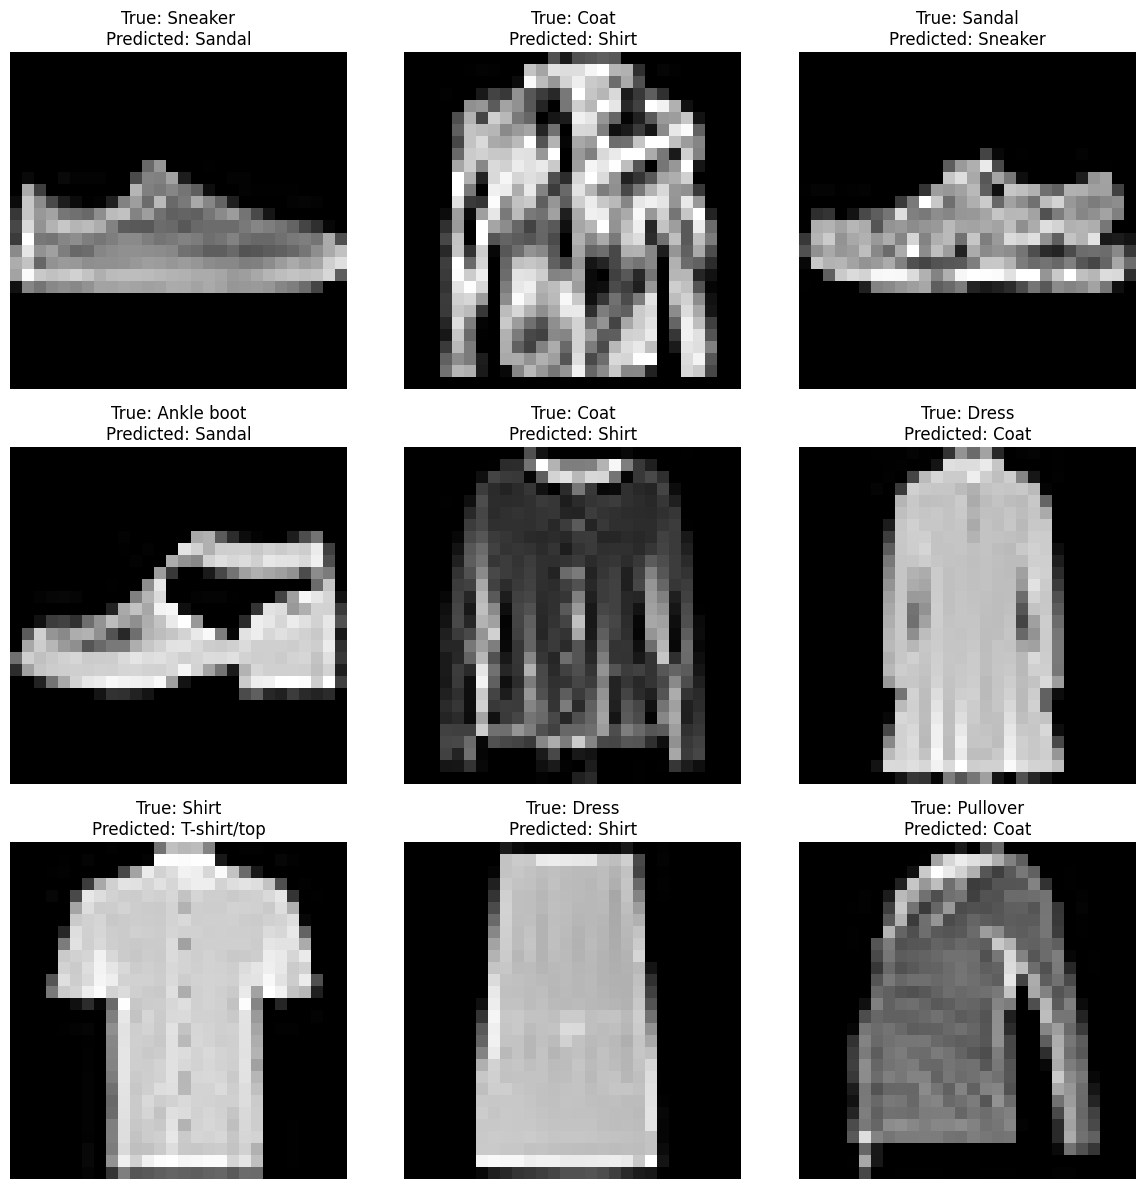

In [35]:
# Visualize Wrong Predictions
# Import the matplotlib library for plotting images
import matplotlib.pyplot as plt

# Define the label names for each class in the Fashion MNIST dataset
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Find the indices where the predicted labels do not match the true labels
# This gives us the indices of incorrect predictions
wrong = np.where(predicted_labels != test_labels)[0]

# Set the figure size for displaying the images (12x12 inches)
plt.figure(figsize=(12, 12))

# Loop through the first 9 wrong predictions and plot them
for i, index in enumerate(wrong[:9]):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots and access the (i+1)th plot
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')  # Show the image in grayscale
    # Add a title showing the true and predicted class names
    plt.title(f"True: {class_names[test_labels[index]]}\nPredicted: {class_names[predicted_labels[index]]}")
    plt.axis('off')  # Turn off axis ticks for a cleaner look

# Adjust subplot layout to avoid overlapping elements
plt.tight_layout()

# Display the final plot
plt.show()


#####**Save the model to Google drive or local**

In [36]:
model.save('trained_fashion_mnist_model.h5')

In [37]:
model.save("drive/MyDrive/Saved Models/plant_disease_prediction_model.h5")

####**Building an Autoencoder to train reconstruct input images**

In [38]:
def build_autoencoder(activation_name='relu'):
    # Select activation
    if activation_name == 'leaky_relu':
        activation = LeakyReLU(alpha=0.3)
    elif activation_name == 'relu':
        activation = 'relu'
    else:
        raise ValueError("Unsupported activation. Use 'relu' or 'leaky_relu'.")

    model = Sequential()

    # 🧠 Encoder
    model.add(Conv2D(32, (3, 3), activation=activation, padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Conv2D(64, (3, 3), activation=activation, padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Conv2D(128, (3, 3), activation=activation, padding='same'))

    # 🧱 Decoder
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation, padding='same'))

    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation=activation, padding='same'))

    # 🎯 Output Layer
    model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return model  # ✅ Return the model

# ✅ Build the model
autoencoder = build_autoencoder('leaky_relu')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Autoencoder summary
autoencoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,217 (723.50 KB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# ⚙️ Compile with Optimized Settings
autoencoder.compile(
    optimizer=  keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy',
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')]
)


In [41]:
# Add callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1),
    ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

In [42]:
 # 🏋️‍♂️ Train the autoencoder
history = autoencoder.fit(
    train_images, train_images,  # Note: input == output for autoencoders
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(test_images, test_images),
    callbacks=callbacks
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4965 - loss: 0.0726 - precision: 0.5392 - recall: 0.0148
Epoch 1: val_loss improved from inf to 0.00830, saving model to best_autoencoder.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.4965 - loss: 0.0725 - precision: 0.5392 - recall: 0.0148 - val_accuracy: 0.4999 - val_loss: 0.0083 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0082 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss improved from 0.00830 to 0.00815, saving model to best_autoencoder.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5028 - loss: 0.0082 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4999 - val_loss: 0.0081 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0081 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3: val_loss improved from 0.00815 to 0.00804, saving model to best_autoencoder.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5028 - loss: 0.0081 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4999 - val_loss: 0.0080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 4: val_loss improved from 0.00804 to 0.00801, saving model to best_autoencoder.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4999 - val_loss: 0.0080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/10
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 5: val_loss improved from 0.00801 to 0.00800, saving model to best_autoencoder.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4999 - val_loss: 0.0080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 6: val_loss improved from 0.00800 to 0.00800, saving model to best_autoencoder.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4999 - val_loss: 0.0080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 7/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 7: val_loss improved from 0.00800 to 0.00800, saving model to best_autoencoder.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4999 - val_loss: 0.0080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-06
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 8: val_loss improved from 0.00800 to 0.00800, saving model to best_autoencoder.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4999 - val_loss: 0.0080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-07
Epoch 9/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 9: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 9: val_loss did not improve from 0.00800
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4999 - val_loss: 0.0080 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-08
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5028 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 10: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 10: val_loss did not improve from 0.00

In [43]:
print(autoencoder.history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall', 'learning_rate'])


In [44]:
print(history.history['accuracy'])  # ✅ Training accuracy for each epoch
print(history.history['val_loss'])  # ✅ Validation loss for each epoch

[0.501105785369873, 0.5020513534545898, 0.5020513534545898, 0.5020513534545898, 0.5020513534545898, 0.5020513534545898, 0.5020513534545898, 0.5020513534545898, 0.5020513534545898, 0.5020513534545898]
[0.008297019638121128, 0.008145238272845745, 0.008041457273066044, 0.008005176670849323, 0.007997114211320877, 0.00799666065722704, 0.007996629923582077, 0.007996627129614353, 0.007996627129614353, 0.007996627129614353]


####**Model Evaluation**

In [45]:
# Evaluate the model
decoded_imgs = autoencoder.predict(test_images)
test_loss = tf.keras.losses.binary_crossentropy(test_images.reshape(-1, 28*28), decoded_imgs.reshape(-1, 28*28)).numpy().mean()
print('\nTest loss:', test_loss)  # Print the calculated test loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

Test loss: 0.007996626


In [46]:
# Evaluate the autoencoder by comparing inputs to reconstructed outputs
test_loss = autoencoder.evaluate(test_images, test_images, verbose=2)

print('\nReconstruction Loss (Test):', test_loss)


313/313 - 1s - 5ms/step - accuracy: 0.4999 - loss: 0.0080 - precision: 0.0000e+00 - recall: 0.0000e+00

Reconstruction Loss (Test): [0.007996628992259502, 0.4998960494995117, 0.0, 0.0]


In [47]:
# ✅ Define a threshold value for binarization (pixel values > 0.5 become 1, else 0)
threshold = 0.5

# ✅ Flatten both the original test images and reconstructed images
# - Reshape from (num_samples, 28, 28) to (num_samples, 784) for easier comparison
original = test_images.reshape(-1, 28*28)
reconstructed = decoded_imgs.reshape(-1, 28*28)

# ✅ Binarize the original images (convert to 0 or 1)
# - Any pixel > 0.5 becomes 1, else becomes 0
original_bin = (original > threshold).astype(int)

# ✅ Binarize the reconstructed images using the same threshold
reconstructed_bin = (reconstructed > threshold).astype(int)

# ✅ Calculate pixel-wise accuracy
# - Compares each pixel value (0 or 1) between original and reconstructed images
# - Computes mean to get the percentage of correctly reconstructed pixels
reconstruction_accuracy = np.mean(original_bin == reconstructed_bin)

# ✅ Print the reconstruction accuracy
print("Reconstruction Accuracy:", reconstruction_accuracy)


Reconstruction Accuracy: 1.0


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


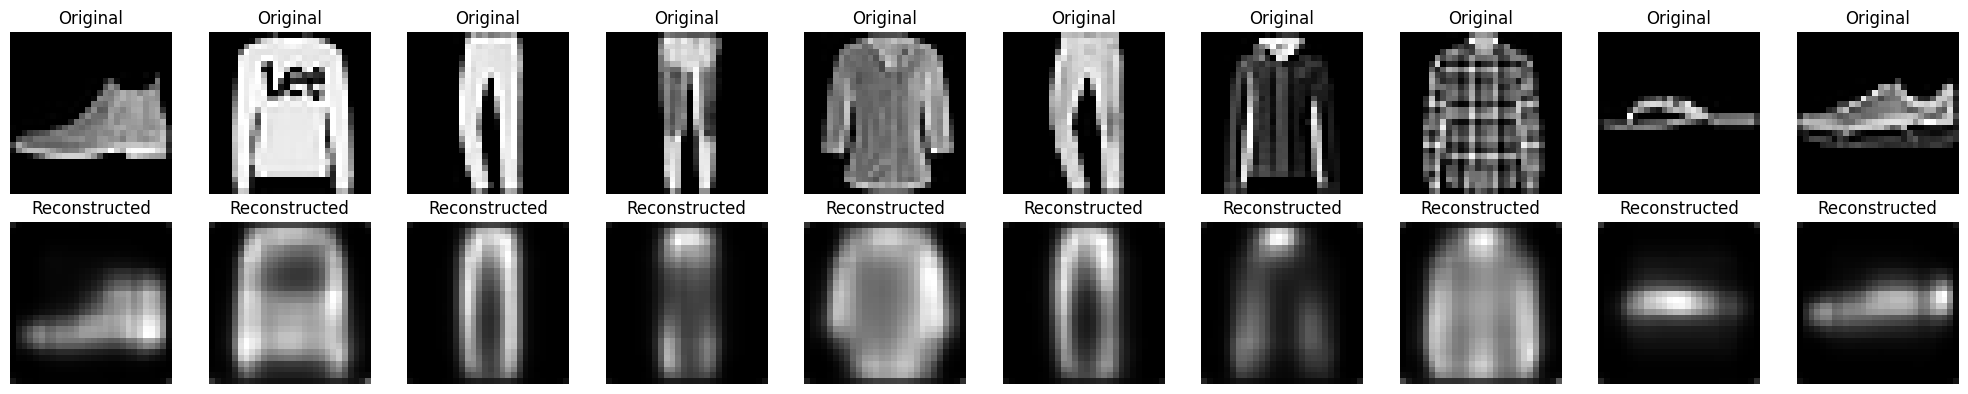

In [48]:
import matplotlib.pyplot as plt

# Get predictions from the trained autoencoder
decoded_imgs = autoencoder.predict(test_images)

# Number of images to display
n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
    # 🔵 Original Image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # 🟣 Reconstructed Image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.show()


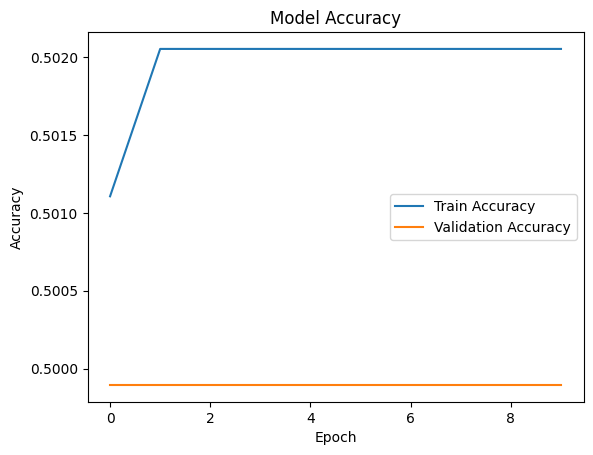

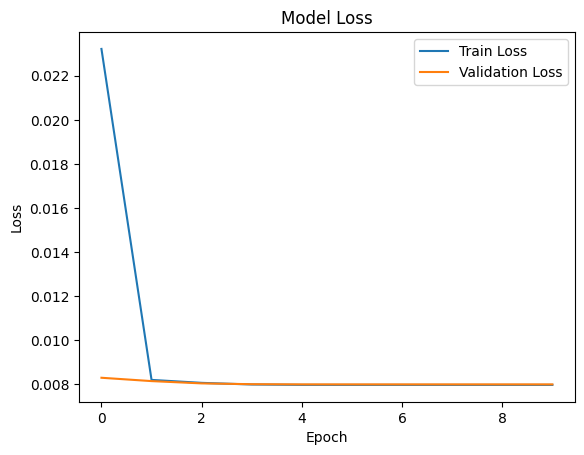

In [49]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [51]:
# Get predictions from the model
predictions = autoencoder.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [52]:
# Predict a single image for anomaly detection
def detect_anomaly(image):
    # ✅ Step 1: Preprocess the image
    img = image.convert('L').resize((28, 28))  # Convert image to grayscale (L mode) and resize to 28x28 pixels
    img_array = np.array(img).astype('float32') / 255.0  # Convert image to NumPy array and normalize pixel values to [0, 1]
    img_input = img_array.reshape(1, 28, 28, 1)  # Reshape to match model input shape (batch_size, height, width, channels)

    # ✅ Step 2: Use the autoencoder to reconstruct the image
    reconstructed = autoencoder.predict(img_input)  # Output will have same shape as input

    # ✅ Step 3: Compute Mean Squared Error (MSE) between input and reconstruction
    mse = np.mean((img_input - reconstructed) ** 2)  # High MSE means reconstruction failed = anomaly

    # ✅ Step 4: Compare MSE to a manually defined threshold
    threshold = 0.01  # Threshold for what is considered a "normal" image; tweak this based on testing

    # ✅ Step 5: Return the result based on MSE comparison
    status = "✅ Normal" if mse < threshold else "🚨 Anomaly"  # Classify the input
    return f"{status} | Reconstruction Error: {mse:.5f}"  # Return result with formatted MSE


In [53]:
import gradio as gr

interface = gr.Interface(
    fn=detect_anomaly,
    inputs=gr.Image(type="pil", label="🖼️ Upload Grayscale Image"),
    outputs=gr.Textbox(label="Anomaly Status"),
    title="🔍 Autoencoder Anomaly Detector",
    description="Detect whether an image is normal or anomalous based on reconstruction error using an autoencoder."
)

interface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c6de8abe4111455a5b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c6de8abe4111455a5b.gradio.live


####**Building another CNN Model Architechecture**

In [54]:
# Build the convolutional base
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10))


# Compile and train the model
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_2 = model_2.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


# Evaluate the model
test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0989 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
313/313 - 1s - 2ms/step - accuracy: 0.1000 - loss: 2.3026

Test accuracy: 0.10000000149011612


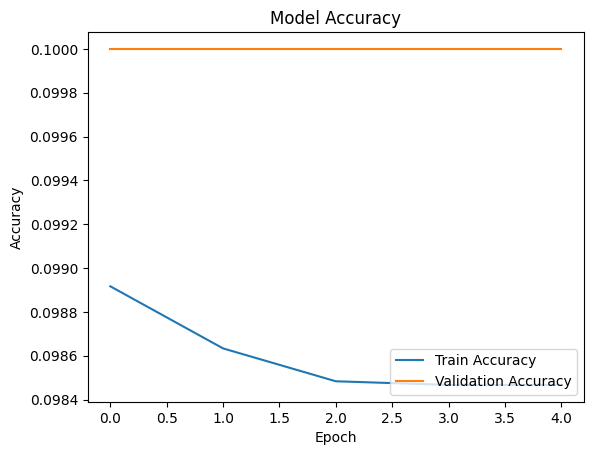

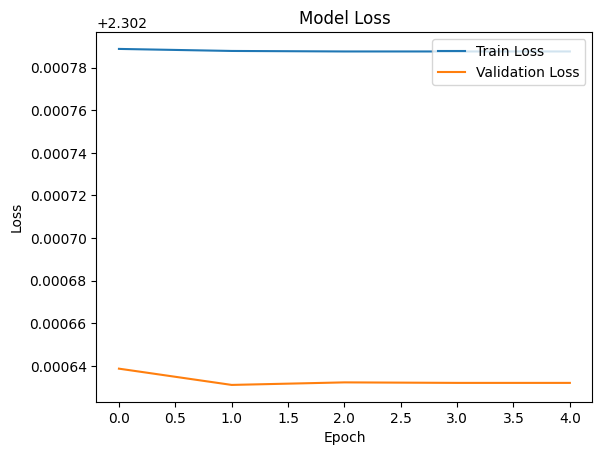

In [55]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [56]:
# Get predictions from the model
predictions_2 = model_2.predict(test_images)

# Convert predictions to class labels
predicted_labels_2 = np.argmax(predictions_2, axis=1)

# Generate the confusion matrix
conf_mat_2 = confusion_matrix(test_labels, predicted_labels_2)
print(conf_mat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
tf.Tensor(
[[831   0  41  42   8   2  63   0  13   0]
 [  6 963   1  21   4   1   3   0   1   0]
 [ 13   1 735  13 127   0 103   0   8   0]
 [ 26  12  22 878  33   0  27   0   2   0]
 [  0   2  76  42 755   0 118   0   7   0]
 [  0   0   0   2   0 923   0  48   5  22]
 [200   1 136  28 119   0 493   0  23   0]
 [  0   0   0   0   0  23   0 915   0  62]
 [  2   2   9   4   6   2   7   4 963   1]
 [  0   0   0   0   0   7   0  38   1 954]], shape=(10, 10), dtype=int32)


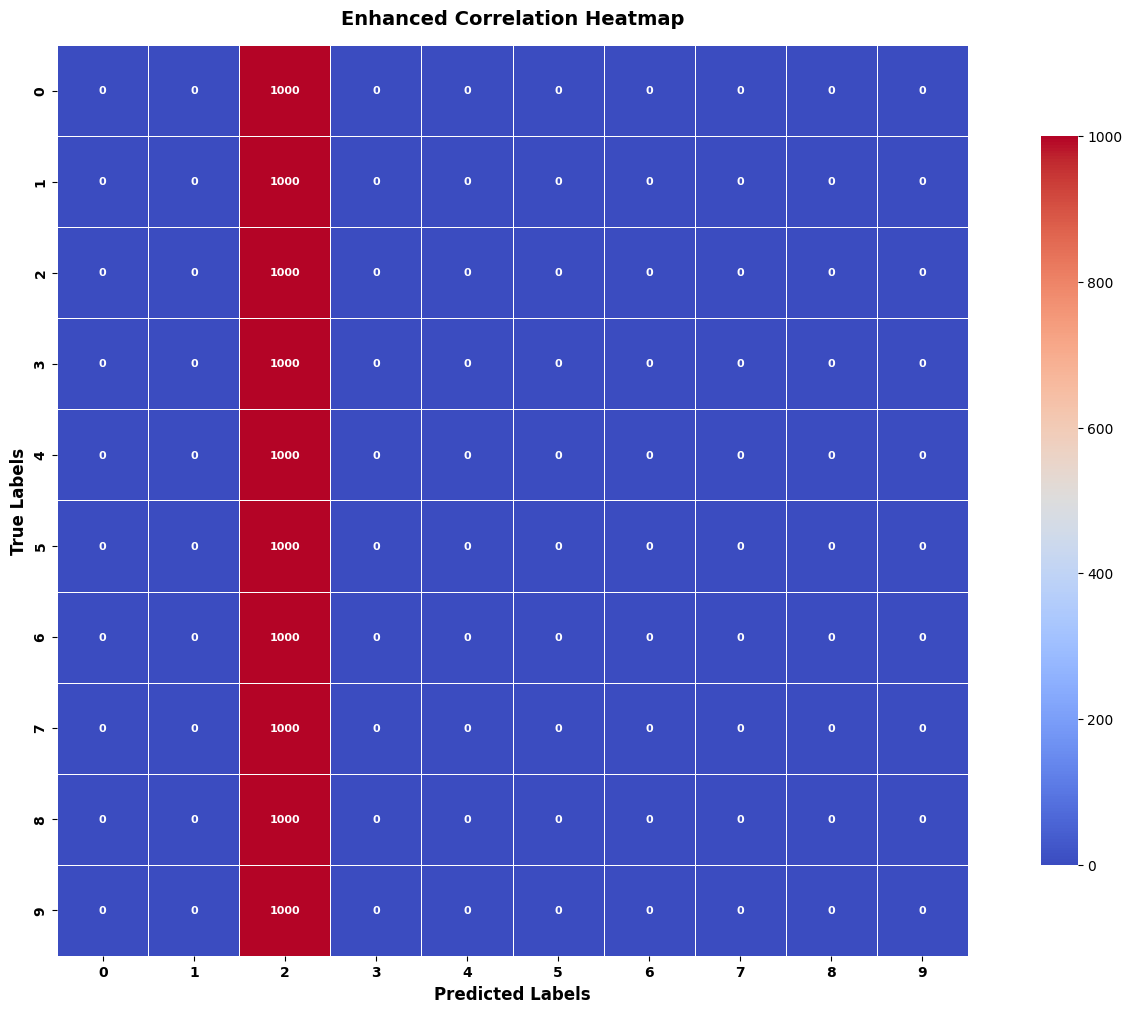

In [57]:
# Create the heatmap with enhancements
plt.figure(figsize=(15, 10))
sns.heatmap(
    conf_mat_2,
    annot=True,
    fmt="d",  # integers
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()
plt.ylabel("True Labels", fontsize=12, fontweight="bold")
plt.xlabel("Predicted Labels", fontsize=12, fontweight="bold")
plt.show()

In [58]:
def predict_fashion_image(image):
    """🧵 Predict the Fashion MNIST category from an uploaded image."""

    # 🖤 Convert to grayscale (Fashion MNIST is grayscale)
    image_gray = image.convert('L')

    # 📏 Resize to 28x28 pixels
    image_resized = image_gray.resize((28, 28))

    # 🧮 Convert to numpy array
    image_array = np.array(image_resized)

    # 🧼 Normalize pixel values to range [0, 1]
    img_normalized = image_array / 255.0

    # 🔄 Reshape for the CNN model (batch_size, height, width, channels)
    img_reshaped = img_normalized.reshape(1, 28, 28, 1)

    # 🧠 Make prediction
    prediction = model_2.predict(img_reshaped)

    # 🎯 Get the predicted class index
    predicted_label = np.argmax(prediction)

    # 🏷️ Map label to class name (if available)
    class_names = [
        "T-shirt/top 👕", "Trouser 👖", "Pullover 🧥", "Dress 👗", "Coat 🧥",
        "Sandal 🩴", "Shirt 👔", "Sneaker 👟", "Bag 👜", "Ankle boot 👢"
    ]
    predicted_class = class_names[predicted_label]

    return f"👚 Predicted Fashion Item: {predicted_class}"


In [59]:
import gradio as gr

interface = gr.Interface(
    fn=predict_fashion_image,
    inputs=gr.Image(type="pil", label="📤 Upload a Fashion Image"),
    outputs=gr.Textbox(label="🎯 Predicted Category"),
    title="🧵 Fashion MNIST Classifier",
    description="Upload a grayscale fashion image (28x28 or larger) and the model will predict its category (e.g., 👗, 👕, 👢)."
)

# 🚀 Launch the App
interface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://b2c26cfe1b11912573.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b2c26cfe1b11912573.gradio.live
